##Bring in libraries and dataframes and set indexes

In [12]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
%matplotlib inline

In [13]:
#Read in data calibrated VWC data
Data = pd.read_pickle('.\DataFrames\LysoDrainage_df')

## Set time slice to graph

In [14]:
from datetime import timedelta #Import function needed for doing date deltas 
EndDate = Data.index.max()  #Set end of series as most recent date in file
EndDateString = EndDate.strftime("%Y-%m-%d")  #Turn this to a string
PlotDuration = 1
#Set the duration that you want to graph for
StartDate = EndDate - timedelta(weeks=PlotDuration)       #Set start date the specified duration before the end date 
StartDateString = StartDate.strftime("%Y-%m-%d")           #Turn that into a string
EndDate

Timestamp('2015-11-02 12:00:00')

In [15]:
StartDateString

'2015-10-26'

##Graph all sensors to check for anomolies

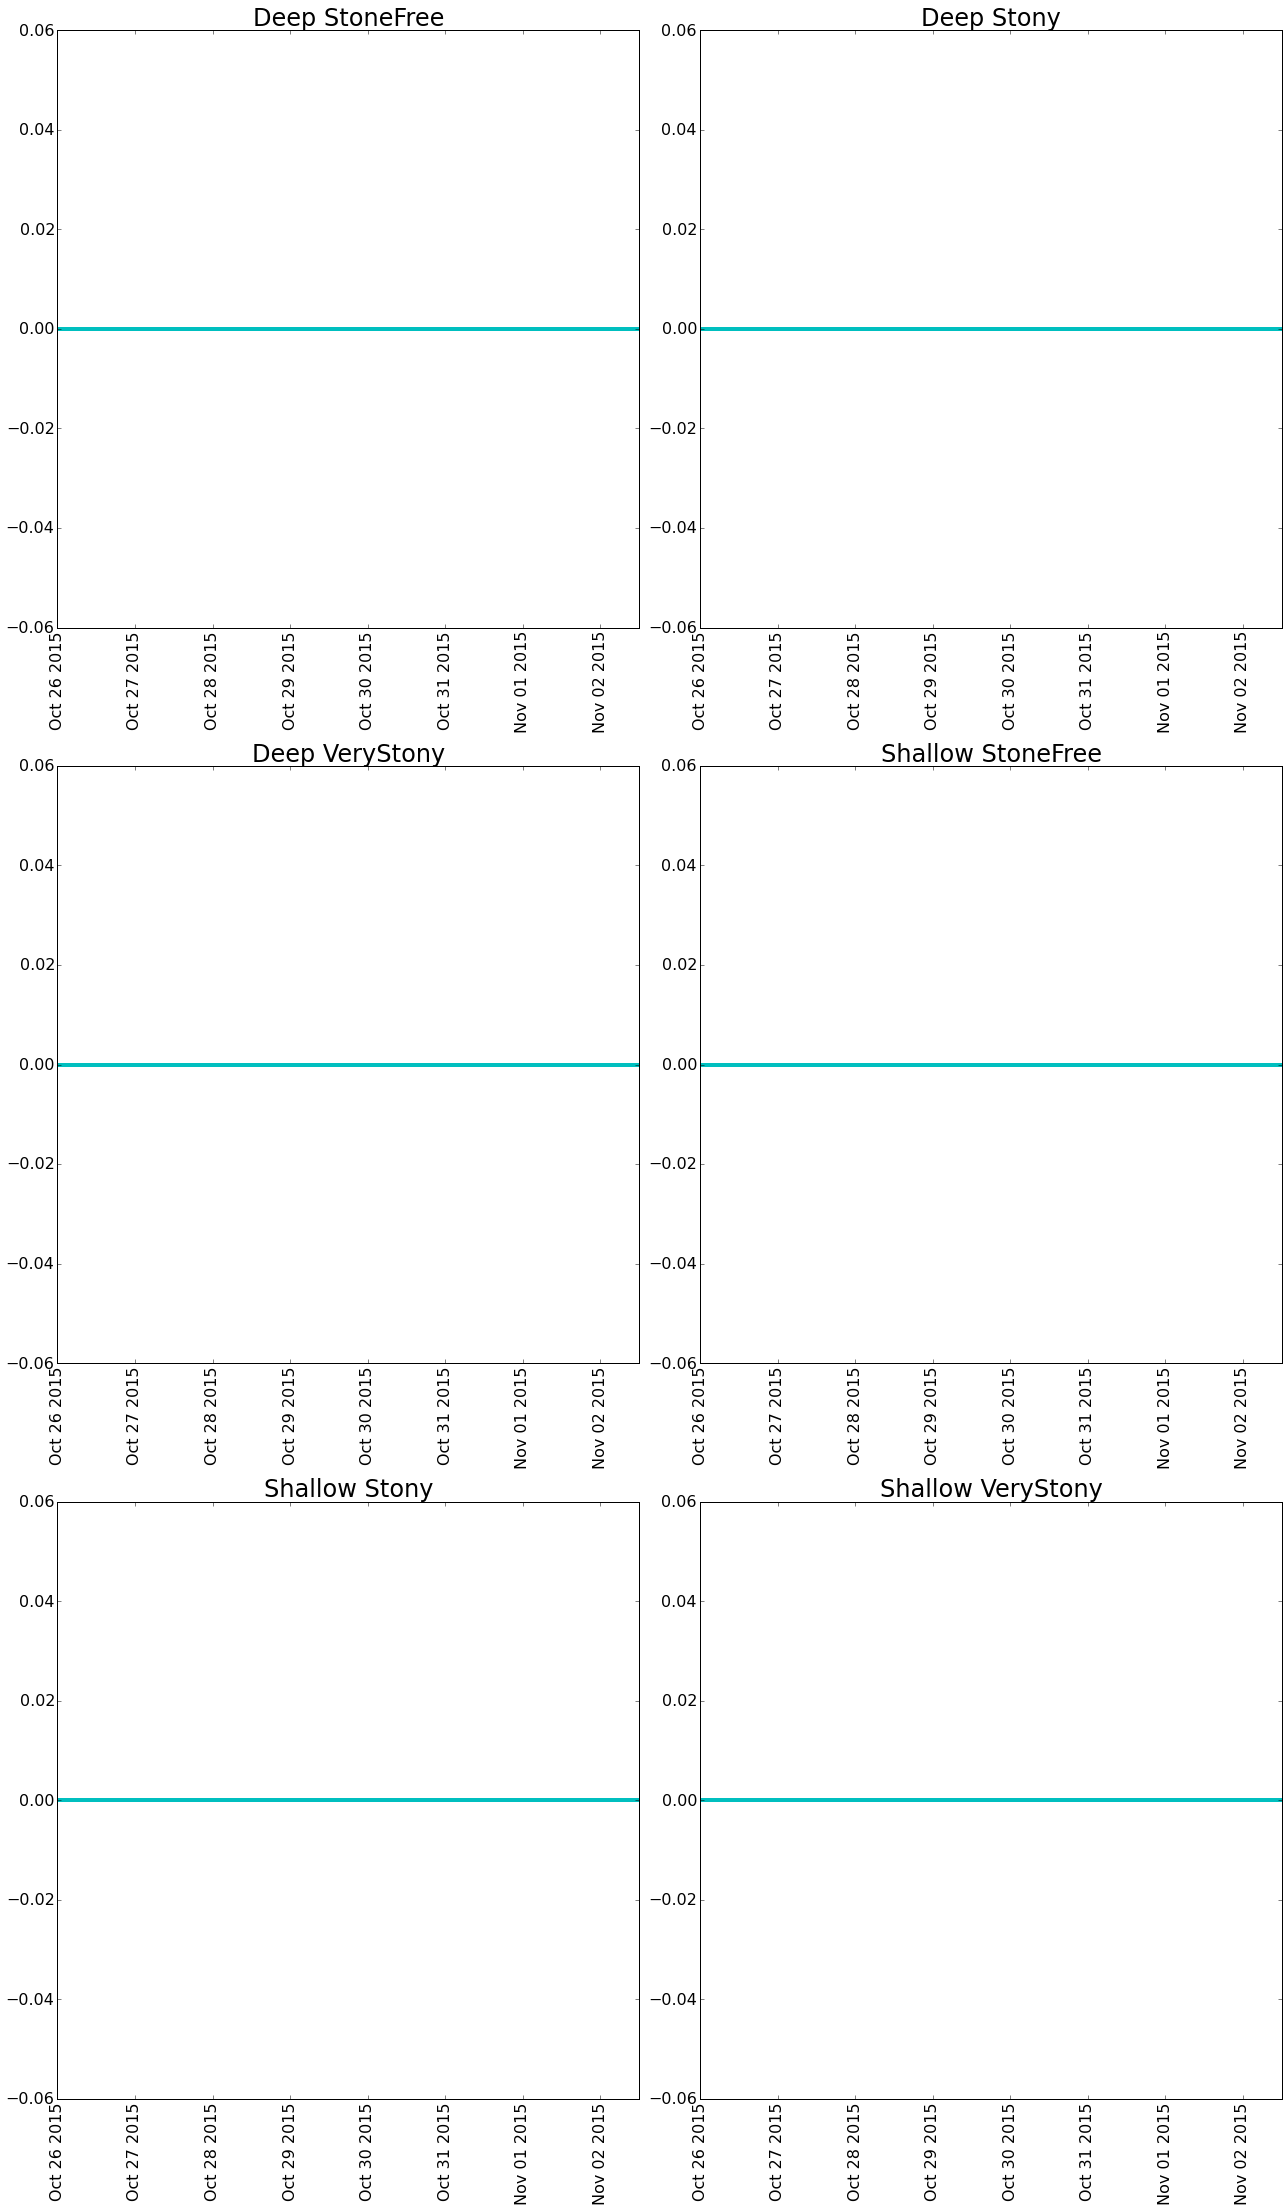

In [16]:
AccumData = Data.ix[StartDateString:,:].cumsum()
#AccumData.ix[:,('Deep','StoneFree')]
Fig = plt.figure(figsize=(18, 60))

Fig.add_subplot(6,2,1)
plt.title('Deep StoneFree', fontsize=24);
plt.plot(AccumData.index,AccumData.ix[:,('Deep','StoneFree')], linewidth = 4);
plt.tick_params(labelsize=16);
plt.xticks(rotation=90)
Fig.add_subplot(6,2,2)
plt.title('Deep Stony', fontsize=24);
plt.plot(AccumData.index,AccumData.ix[:,('Deep','Stony')], linewidth = 4);
plt.tick_params(labelsize=16);
plt.xticks(rotation=90)
Fig.add_subplot(6,2,3)
plt.title('Deep VeryStony', fontsize=24);
plt.plot(AccumData.index,AccumData.ix[:,('Deep','VeryStony')], linewidth = 4);
plt.tick_params(labelsize=16);
plt.xticks(rotation=90)
Fig.add_subplot(6,2,4)
plt.title('Shallow StoneFree', fontsize=24);
plt.plot(AccumData.index,AccumData.ix[:,('Shallow','StoneFree')], linewidth = 4);
plt.tick_params(labelsize=16);
plt.xticks(rotation=90)
Fig.add_subplot(6,2,5)
plt.title('Shallow Stony', fontsize=24);
plt.plot(AccumData.index,AccumData.ix[:,('Shallow','Stony')], linewidth = 4);
plt.tick_params(labelsize=16);
plt.xticks(rotation=90)
Fig.add_subplot(6,2,6)
plt.title('Shallow VeryStony', fontsize=24);
plt.plot(AccumData.index,AccumData.ix[:,('Shallow','VeryStony')], linewidth = 4);
plt.tick_params(labelsize=16);
plt.legend(loc=1, fontsize=13, ncol=2)
plt.tick_params(labelsize=16);
plt.xticks(rotation=90)

Fig.tight_layout()

In [17]:
AccumData.ix[:,('Shallow','VeryStony')]

Column,1,18,21,9
Sensor,TippingSpoon,TippingSpoon,TippingSpoon,TippingSpoon
MUX,1,3,3,2
Port,1,2,5,1
Units,Count,Count,Count,Count
Summary,Total,Total,Total,Total
Block,R1,R3,R4,R2
Treatment,1F,18F,21F,9F
2015-10-26 00:00:00,0,0,0,0
2015-10-26 00:15:00,0,0,0,0
2015-10-26 00:30:00,0,0,0,0


## Look at the treatment means over time

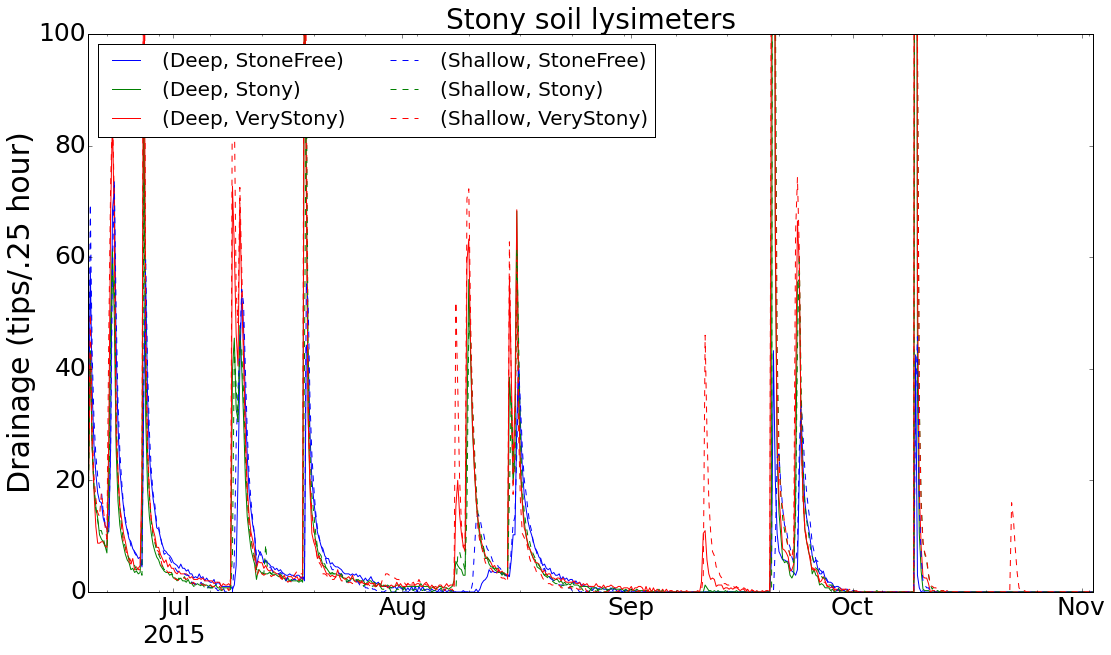

In [18]:
#Calculate treatment means omitting data prior to 2014-11-05 08:00:00 to avoid NaN values
DataMeans =  Data.groupby(level=['Gravels','Stones'],axis=1).mean()
DataMeans =  DataMeans.dropna(axis=1) #For some reason it keeps non valid combinations in so need to extract with this function

AccumDrain = DataMeans.resample('6h', how='sum')#.cumsum()
                
AccumDrain['2015-04-26':].plot(figsize=(18,10),style=['b-','g-','r-','b--','g--','r--'],ylim=(0,100))
plt.ylabel('Drainage (tips/.25 hour)', fontsize=30);
plt.tick_params(labelsize=25)
plt.title('Stony soil lysimeters', fontsize=28)
plt.legend(fontsize = 20, loc=2, ncol=2)

In [19]:

##Graph treatment means by layer

In [20]:
#!gist -p -d "Setting up Soil summary for Export" SoilWaterAnalysis.ipynb

In [21]:
!gist -u https://gist.github.com/604c4dfd746733297790 SoilWaterAnalysis.ipynb

https://gist.github.com/604c4dfd746733297790


In [22]:
from plotly.graph_objs import *

DeepStoneFree = Scatter(x=AccumDrain['2015-04-26':].index,
                        y=AccumDrain.ix['2015-04-26':,('Deep','StoneFree')],
                        name = 'Deep StoneFree',
                        line = Line(color = 'blue', dash ='solid')
                       )

ShallowStoneFree = Scatter(x=AccumDrain['2015-04-26':].index,
                           y=AccumDrain.ix['2015-04-26':,('Shallow','StoneFree')],
                           name = 'Shallow StoneFree',
                           line = Line(color = 'blue', dash ='dash')
                           )
DeepStony = Scatter(x=AccumDrain['2015-04-26':].index,
                        y=AccumDrain.ix['2015-04-26':,('Deep','Stony')],
                        name = 'Deep Stony',
                        line = Line(color = 'green', dash ='solid')
                       )

ShallowStony = Scatter(x=AccumDrain['2015-04-26':].index,
                           y=AccumDrain.ix['2015-04-26':,('Shallow','Stony')],
                           name = 'Shallow Stony',
                           line = Line(color = 'green', dash ='dash')
                           )
DeepVeryStony = Scatter(x=AccumDrain['2015-04-26':].index,
                        y=AccumDrain.ix['2015-04-26':,('Deep','VeryStony')],
                        name = 'Deep VeryStony',
                        line = Line(color = 'red', dash ='solid')
                       )

ShallowVeryStony = Scatter(x=AccumDrain['2015-04-26':].index,
                           y=AccumDrain.ix['2015-04-26':,('Shallow','VeryStony')],
                           name = 'Shallow VeryStony',
                           line = Line(color = 'red', dash ='dash')
                           )

data = Data([DeepStoneFree, ShallowStoneFree, DeepStony, ShallowStony, DeepVeryStony, ShallowVeryStony])

py.iplot(data, filename = 'basic-line')